In [1]:
#UCL 21-22 data analysis
#Loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inLine

In [5]:
#data for goals
ucl_df=pd.read_csv('E:\\data\\UCL 21-22\\goals.csv')
#data for attacking
ucl_assist=pd.read_csv('E:\\data\\UCL 21-22\\attacking.csv')
#data for goalkeeping
ucl_keep=pd.read_csv('E:\\data\\UCL 21-22\\goalkeeping.csv')
#data for distribution
ucl_dis=pd.read_csv('E:\\data\\UCL 21-22\\distribution.csv')
#data for defending
ucl_def=pd.read_csv('E:\\data\\UCL 21-22\\defending.csv')
#data for disciplinary
ucl_disp = pd.read_csv('E:\\data\\UCL 21-22\\disciplinary.csv', encoding='latin-1')
ucl_df.head()

,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
0,1,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
1,2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10
2,3,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8
3,4,Salah,Liverpool,Forward,8,0,8,0,0,7,1,1,13
4,5,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6


In [4]:
ucl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   serial         183 non-null    int64 
 1   player_name    183 non-null    object
 2   club           183 non-null    object
 3   position       183 non-null    object
 4   goals          183 non-null    int64 
 5   right_foot     183 non-null    int64 
 6   left_foot      183 non-null    int64 
 7   headers        183 non-null    int64 
 8   others         183 non-null    int64 
 9   inside_area    183 non-null    int64 
 10  outside_areas  183 non-null    int64 
 11  penalties      183 non-null    int64 
 12  match_played   183 non-null    int64 
dtypes: int64(10), object(3)
memory usage: 18.7+ KB


In [6]:
ucl_df.describe()

,serial,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,55.016393,2.021858,0.972678,0.693989,0.327869,0.021858,1.814208,0.207650,0.196721,6.841530
std,24.173929,2.005367,1.400281,1.140810,0.612722,0.146621,1.923943,0.514137,0.549315,2.568196
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,43.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000
50%,73.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.000000
75%,73.000000,2.000000,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,8.000000
max,73.000000,15.000000,11.000000,8.000000,3.000000,1.000000,13.000000,3.000000,3.000000,13.000000


In [7]:
#checking for null values if present
ucl_df.isna().sum()

serial           0
player_name      0
club             0
position         0
goals            0
right_foot       0
left_foot        0
headers          0
others           0
inside_area      0
outside_areas    0
penalties        0
match_played     0
dtype: int64

In [8]:
total_goals=ucl_df['goals'].sum()
print(total_goals)

370


In [9]:
total_penalties=ucl_df['penalties'].sum()
print(total_penalties)

36


In [10]:
#finding unique values
ucl_df['position'].unique()

array(['Forward', 'Midfielder', 'Defender'], dtype=object)

In [211]:
#finding the clubs which played the ucl for 2022
ucl_df['club'].unique()

array(['Real Madrid', 'Bayern', 'Ajax', 'Liverpool', 'Leipzig',
       'Man. City', 'Paris', 'Benfica', 'Man. United', 'Villarreal',
       'Chelsea', 'Sporting CP', 'Atlético', 'Dortmund', 'Salzburg',
       'Club Brugge', 'Atalanta', 'LOSC', 'Inter', 'Juventus', 'Sevilla',
       'Shakhtar Donetsk', 'Zenit', 'Young Boys', 'Wolfsburg', 'Sheriff',
       'Porto', 'Dynamo Kyiv', 'Barcelona', 'Milan', 'Malmö', 'Beşiktaş'],
      dtype=object)

<Axes: xlabel='club'>

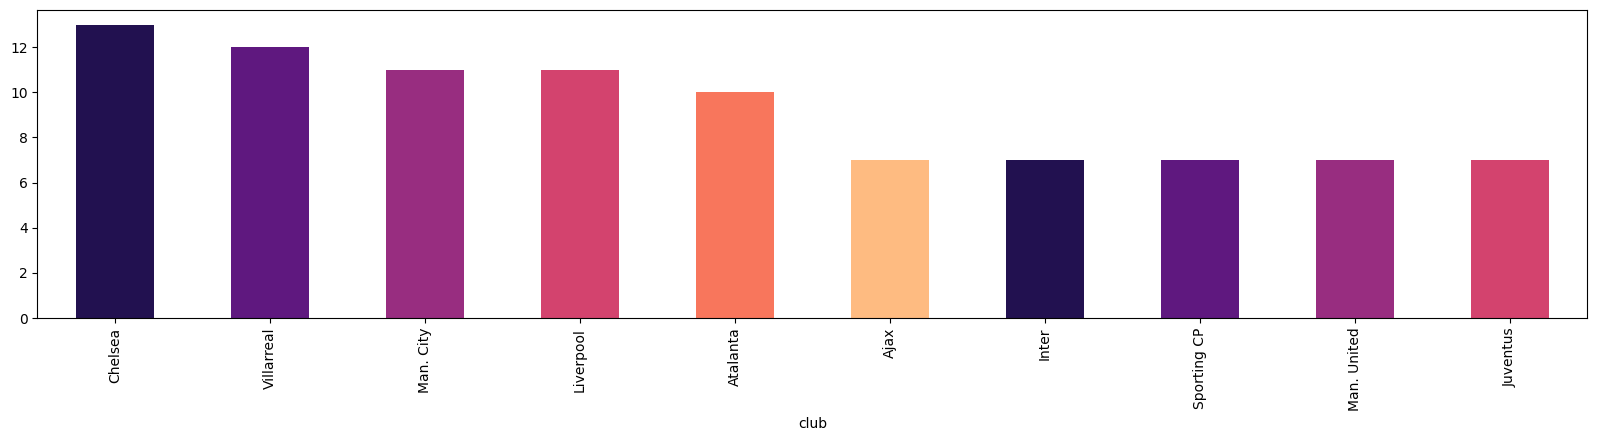

In [11]:
#most players from which club
club_pl=ucl_df.groupby('club').size().sort_values(ascending=False)
club_pl.head(10).plot(kind='bar',figsize=(20,4),color=sns.color_palette("magma"))

In [12]:
#top 10 players with most goals
goals_df=ucl_df[['player_name','club','match_played','position','penalties','goals']].nlargest(n=10, columns='goals')
print(goals_df)

   player_name         club  match_played    position  penalties  goals
0      Benzema  Real Madrid            12     Forward          3     15
1  Lewandowski       Bayern            10     Forward          3     13
2       Haller         Ajax             8     Forward          1     11
3        Salah    Liverpool            13     Forward          1      8
4       Nkunku      Leipzig             6  Midfielder          0      7
5       Mahrez    Man. City            12  Midfielder          2      7
6       Mbappé        Paris             8     Forward          0      6
7        Núñez      Benfica            10     Forward          1      6
8      Ronaldo  Man. United             7     Forward          0      6
9      Danjuma   Villarreal            11  Midfielder          1      6


In [13]:
#total goals scored in ucl by headers
ucl_df['headers'].sum()

60

In [14]:
#top 10 players who scored the maximun headers
ucl_df[['player_name','club','headers']].nlargest(n=10, columns='headers')

,player_name,club,headers
0,Benzema,Real Madrid,3
2,Haller,Ajax,3
4,Nkunku,Leipzig,3
5,Mahrez,Man. City,2
40,Havertz,Chelsea,2
41,Haaland,Dortmund,2
70,Konaté,Liverpool,2
71,Coates,Sporting CP,2
1,Lewandowski,Bayern,1
7,Núñez,Benfica,1


In [15]:
#total players who scored goals from the team Real Madrid
a_df=ucl_df[['player_name','goals','club','match_played','position']]
goals_each_club= a_df[a_df['goals']>0]
goals_club=goals_each_club[goals_each_club["club"]=='Real Madrid']
print(goals_club)

         player_name  goals         club  match_played    position
0            Benzema     15  Real Madrid            12     Forward
13           Rodrygo      5  Real Madrid            10     Forward
18   Vinícius Júnior      4  Real Madrid            13     Forward
56             Kroos      2  Real Madrid            12  Midfielder
152            Alaba      1  Real Madrid            12    Defender
153          Asensio      1  Real Madrid             8     Forward


In [16]:
#top 10 defenders who scored goals
b_df=ucl_df[['player_name','goals','club','match_played','position']]
d_goals=b_df[b_df["position"]=='Defender']
def_goals=d_goals.nlargest(n=10,columns="goals")
print(def_goals)

     player_name  goals         club  match_played  position
48  João Cancelo      2    Man. City             9  Defender
70        Konaté      2    Liverpool             8  Defender
71        Coates      2  Sporting CP             6  Defender
75    Pau Torres      1   Villarreal            12  Defender
77      Gilberto      1      Benfica             9  Defender
81   Azpilicueta      1      Chelsea             9  Defender
84   Christensen      1      Chelsea             8  Defender
85      Škriniar      1        Inter             8  Defender
93        Walker      1    Man. City             7  Defender
97       Mukiele      1      Leipzig             6  Defender


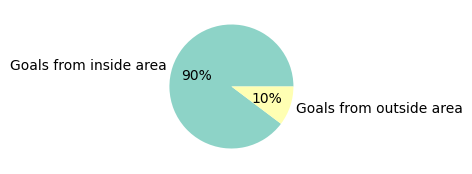

In [17]:
#goals scored from inside area vs goals scored from outside area
plt.figure(figsize=(2,8))
inside_area= total_goals - ucl_df["outside_areas"].sum()
outside_area=total_goals - ucl_df['inside_area'].sum()
data=[inside_area,outside_area]
labels=['Goals from inside area',"Goals from outside area"]
colors=sns.color_palette("Set3")
plt.pie(data,labels=labels,colors=colors,autopct="%.0f%%")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_7364\3613705360.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='club', y='goals', data=top, palette='magma')


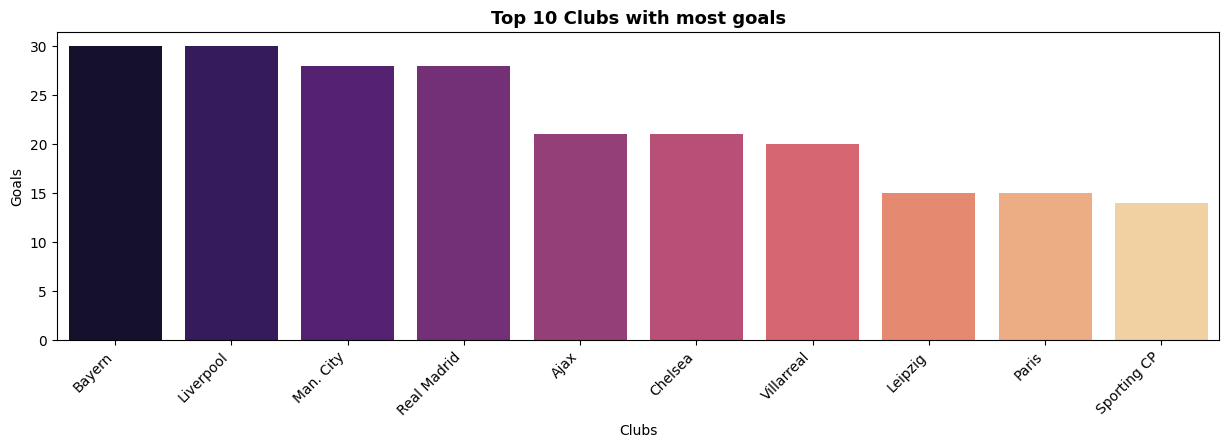

In [54]:
top=ucl_df[["club","goals"]].groupby('club').sum().nlargest(10,columns='goals')
plt.figure(figsize=(15, 4))
sns.barplot(x='club', y='goals', data=top, palette='magma')
plt.xlabel('Clubs')
plt.ylabel('Goals')
plt.title("Top 10 Clubs with most goals", fontsize=13, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

In [20]:
ucl_keep.head()

,serial,player_name,club,position,saved,conceded,saved_penalties,cleansheets,punches made,match_played
0,1,Courtois,Real Madrid,Goalkeeper,61,14,1,5,4,13
1,2,Rulli,Villarreal,Goalkeeper,41,16,0,3,12,12
2,3,Vlachodimos,Benfica,Goalkeeper,38,17,1,5,5,10
3,4,Athanasiadis,Sheriff,Goalkeeper,29,8,0,1,2,5
4,5,Mignolet,Club Brugge,Goalkeeper,28,20,0,0,1,6


In [21]:
ucl_keep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   serial           53 non-null     int64 
 1   player_name      53 non-null     object
 2   club             53 non-null     object
 3   position         53 non-null     object
 4   saved            53 non-null     int64 
 5   conceded         53 non-null     int64 
 6   saved_penalties  53 non-null     int64 
 7   cleansheets      53 non-null     int64 
 8   punches made     53 non-null     int64 
 9   match_played     53 non-null     int64 
dtypes: int64(7), object(3)
memory usage: 4.3+ KB


In [22]:
ucl_keep.isna().sum()

serial             0
player_name        0
club               0
position           0
saved              0
conceded           0
saved_penalties    0
cleansheets        0
punches made       0
match_played       0
dtype: int64

In [23]:
#total number of cleansheets
ucl_keep['cleansheets'].sum()

70

In [62]:
#players with most cleansheets of various clubs
ucl_keep[["player_name","club","cleansheets"]].nlargest(n=10,columns='cleansheets')

,player_name,club,cleansheets
0,Courtois,Real Madrid,5
2,Vlachodimos,Benfica,5
33,Mendy,Chelsea,5
17,Alisson Becker,Liverpool,4
18,Ederson,Man. City,4
22,Neuer,Bayern,4
1,Rulli,Villarreal,3
5,Oblak,Atlético,3
16,Ter Stegen,Barcelona,3
20,Szczęsny,Juventus,3


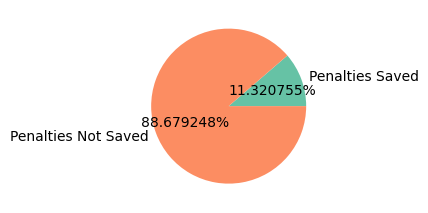

In [24]:
#penalties saved vs penalties miss in the whole tounament
plt.figure(figsize=(2.5,6))
saved_penalties=(ucl_keep['saved_penalties']>0).sum()
not_saved_penalties=(ucl_keep['saved_penalties']==0).sum()
data=[saved_penalties,not_saved_penalties]
labels=["Penalties Saved" , "Penalties Not Saved"]
colors=sns.color_palette("Set2")
plt.pie(data,labels=labels,colors=colors,autopct='%0f%%')
plt.show()

In [25]:
total_saves=ucl_keep[["club","player_name","saved"]].nlargest(n=10,columns='saved')
print(total_saves)

          club       player_name  saved
0  Real Madrid          Courtois     61
1   Villarreal             Rulli     41
2      Benfica       Vlachodimos     38
3      Sheriff      Athanasiadis     29
4  Club Brugge          Mignolet     28
5     Atlético             Oblak     26
6     Atalanta             Musso     21
7     Beşiktaş  Ersin Destanoğlu     20
8  Man. United            De Gea     19
9        Malmö            Dahlin     19


C:\Users\User\AppData\Local\Temp\ipykernel_7364\1267707874.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='player_name', y='saved', data=total_saves, palette='magma')


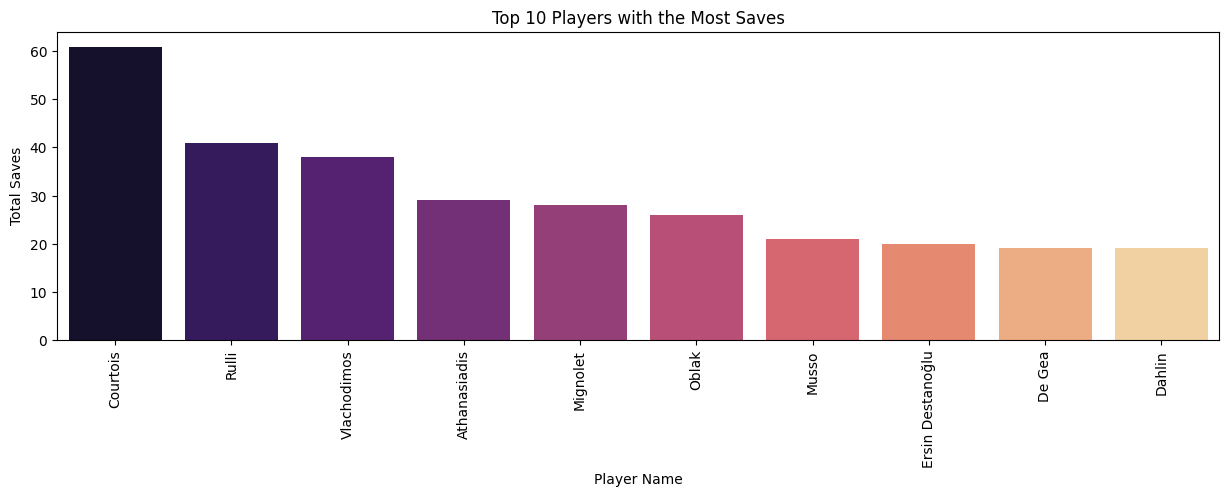

In [26]:
plt.figure(figsize=(15, 4))
sns.barplot(x='player_name', y='saved', data=total_saves, palette='magma')
plt.xlabel('Player Name')
plt.ylabel('Total Saves')
plt.title('Top 10 Players with the Most Saves')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.show()

In [27]:
total_conceded=ucl_keep[["club","player_name","conceded"]].nlargest(n=1,columns='conceded')
print(total_conceded)

          club player_name  conceded
4  Club Brugge    Mignolet        20


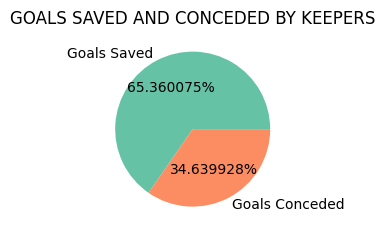

In [28]:
plt.figure(figsize=(2.5,6))
goal_saved = ucl_keep['saved'].sum()
goal_conceded =ucl_keep['conceded'].sum()
data=[goal_saved,goal_conceded]
labels=["Goals Saved","Goals Conceded"]
color=sns.color_palette("Set2")
plt.pie(data,labels=labels,colors=color,autopct="%0f%%")
plt.title("GOALS SAVED AND CONCEDED BY KEEPERS")
plt.show()

In [29]:
ucl_assist.head(10)

,serial,player_name,club,position,assists,corner_taken,offsides,dribbles,match_played
0,1,Bruno Fernandes,Man. United,Midfielder,7,10,2,7,7
1,2,Vinícius Júnior,Real Madrid,Forward,6,3,4,83,13
2,2,Sané,Bayern,Midfielder,6,3,3,32,10
3,4,Antony,Ajax,Forward,5,3,4,28,7
4,5,Alexander-Arnold,Liverpool,Defender,4,36,0,9,9
5,5,De Bruyne,Man. City,Midfielder,4,18,0,14,10
6,5,Modrić,Real Madrid,Midfielder,4,10,0,8,13
7,5,João Mário,Benfica,Midfielder,4,8,0,7,8
8,5,Mbappé,Paris,Forward,4,4,8,43,8
9,5,Gerard Moreno,Villarreal,Forward,4,0,3,9,7


In [30]:
ucl_assist.isna().sum()

serial          0
player_name     0
club            0
position        0
assists         0
corner_taken    0
offsides        0
dribbles        0
match_played    0
dtype: int64

In [31]:
#Top 10 players according to assists
top_assist=ucl_assist[["player_name","club","position","match_played","assists"]].nlargest(10,columns='assists')
print(top_assist)

        player_name         club    position  match_played  assists
0   Bruno Fernandes  Man. United  Midfielder             7        7
1   Vinícius Júnior  Real Madrid     Forward            13        6
2              Sané       Bayern  Midfielder            10        6
3            Antony         Ajax     Forward             7        5
4  Alexander-Arnold    Liverpool    Defender             9        4
5         De Bruyne    Man. City  Midfielder            10        4
6            Modrić  Real Madrid  Midfielder            13        4
7        João Mário      Benfica  Midfielder             8        4
8            Mbappé        Paris     Forward             8        4
9     Gerard Moreno   Villarreal     Forward             7        4


In [32]:
#top midfielders with assists
top_assist[ucl_assist['position']=='Midfielder']

C:\Users\User\AppData\Local\Temp\ipykernel_7364\2381171037.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_assist[ucl_assist['position']=='Midfielder']


,player_name,club,position,match_played,assists
0,Bruno Fernandes,Man. United,Midfielder,7,7
2,Sané,Bayern,Midfielder,10,6
5,De Bruyne,Man. City,Midfielder,10,4
6,Modrić,Real Madrid,Midfielder,13,4
7,João Mário,Benfica,Midfielder,8,4


In [33]:
#top forward players with most assists
top_assist[ucl_assist['position']=='Forward']

C:\Users\User\AppData\Local\Temp\ipykernel_7364\2797325614.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_assist[ucl_assist['position']=='Forward']


,player_name,club,position,match_played,assists
1,Vinícius Júnior,Real Madrid,Forward,13,6
3,Antony,Ajax,Forward,7,5
8,Mbappé,Paris,Forward,8,4
9,Gerard Moreno,Villarreal,Forward,7,4


In [34]:
#top defender with most assists
top_assist[ucl_assist['position']=='Defender']

C:\Users\User\AppData\Local\Temp\ipykernel_7364\2267297585.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_assist[ucl_assist['position']=='Defender']


,player_name,club,position,match_played,assists
4,Alexander-Arnold,Liverpool,Defender,9,4


In [35]:
#total assists in the tournament
tournament_assist=ucl_assist['assists'].sum()
print(tournament_assist)

281


In [36]:
#total assists by clubs
top_club_assist=ucl_assist[["club","assists"]].groupby('club').sum().nlargest(10,columns='assists')
print(top_club_assist)

             assists
club                
Bayern            24
Liverpool         23
Man. City         23
Real Madrid       21
Ajax              17
Chelsea           16
Villarreal        16
Leipzig           12
Atalanta          11
Man. United       11


C:\Users\User\AppData\Local\Temp\ipykernel_7364\3655434167.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='club', y='assists', data=top_club_assist, palette='magma')


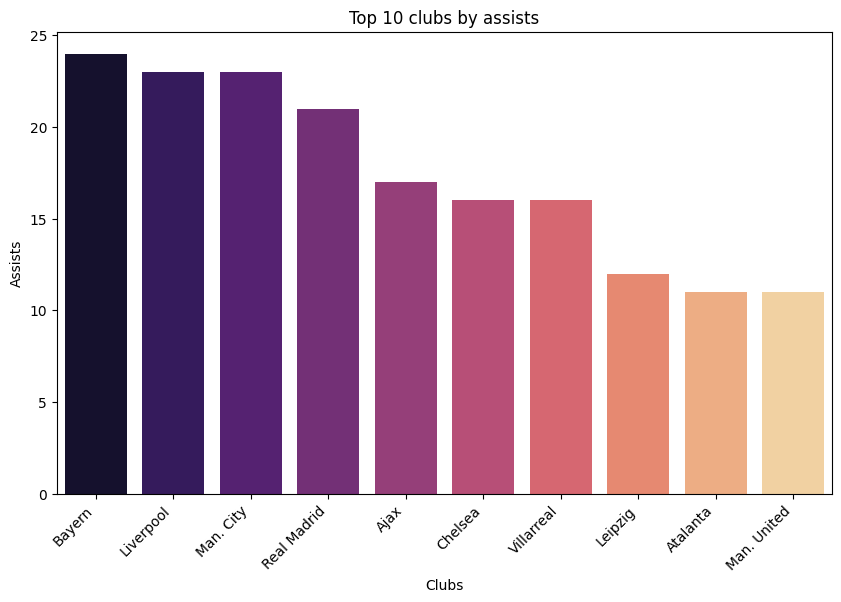

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(x='club', y='assists', data=top_club_assist, palette='magma')
plt.title("Top 10 clubs by assists")
plt.xlabel("Clubs")
plt.ylabel("Assists")
plt.xticks(rotation=45, ha='right')
plt.show()

In [38]:
#players with most assist in Real Madrid
ucl_assist[ucl_assist['club']=='Real Madrid'].nlargest(n=5,columns='assists')

,serial,player_name,club,position,assists,corner_taken,offsides,dribbles,match_played
1,2,Vinícius Júnior,Real Madrid,Forward,6,3,4,83,13
6,5,Modrić,Real Madrid,Midfielder,4,10,0,8,13
38,24,Asensio,Real Madrid,Forward,2,5,0,1,8
45,24,Rodrygo,Real Madrid,Forward,2,1,1,20,11
57,24,Mendy,Real Madrid,Defender,2,0,0,8,10


In [39]:
ucl_dis.head()

,serial,player_name,club,position,pass_accuracy,pass_attempted,pass_completed,cross_accuracy,cross_attempted,cross_complted,freekicks_taken,match_played
0,1,Erokhin,Zenit,Midfielder,98.0,27,26,0,2,0,0,6
1,2,Eric García,Barcelona,Defender,97.5,203,197,0,0,0,1,4
2,3,Ulreich,Bayern,Goalkeeper,97.0,32,31,0,0,0,1,1
3,4,Rugani,Juventus,Defender,96.8,130,122,0,0,0,0,4
4,5,J. Timber,Ajax,Midfielder,95.8,497,474,0,1,0,14,8


In [40]:
sorted_by_cross = ucl_dis[['player_name', 'club', 'position', 'pass_accuracy', 'cross_accuracy']].sort_values(by=['cross_accuracy', 'pass_accuracy'], ascending=[False, False])
sorted_by_cross.head(10)

,player_name,club,position,pass_accuracy,cross_accuracy
32,Thiago Silva,Chelsea,Defender,93.1,100
50,Simakan,Leipzig,Defender,92.0,100
139,Mbemba,Porto,Defender,88.2,100
156,De Ligt,Juventus,Defender,87.6,100
176,Zagadou,Dortmund,Defender,87.0,100
184,Ibrahimović,Milan,Forward,86.8,100
244,Kessié,Milan,Midfielder,85.0,100
279,Vanaken,Club Brugge,Midfielder,83.8,100
291,Schulz,Dortmund,Defender,83.5,100
308,Djimsiti,Atalanta,Defender,83.0,100


In [41]:
sorted_by_cross[sorted_by_cross['position']=='Midfielder'].nlargest(n=10,columns='pass_accuracy')

,player_name,club,position,pass_accuracy,cross_accuracy
0,Erokhin,Zenit,Midfielder,98.0,0
4,J. Timber,Ajax,Midfielder,95.8,0
10,Maycon,Shakhtar Donetsk,Midfielder,94.5,58
11,Nianzou,Bayern,Midfielder,94.5,0
12,Marcos Antônio,Shakhtar Donetsk,Midfielder,94.4,0
14,Stepanenko,Shakhtar Donetsk,Midfielder,94.3,0
15,Rodri,Man. City,Midfielder,94.2,0
18,Arthur,Juventus,Midfielder,94.0,50
22,Paredes,Paris,Midfielder,93.8,0
24,Daniel Bragança,Sporting CP,Midfielder,93.6,0


In [42]:
# Assuming 'player_name' is the common key
merged_data = pd.merge(top_assist, sorted_by_cross, on='player_name', how='inner')
# Display the merged DataFrame
merged_data.head(6)

,player_name,club_x,position_x,match_played,assists,club_y,position_y,pass_accuracy,cross_accuracy
0,Bruno Fernandes,Man. United,Midfielder,7,7,Man. United,Midfielder,78.2,21
1,Vinícius Júnior,Real Madrid,Forward,13,6,Real Madrid,Forward,83.1,31
2,Sané,Bayern,Midfielder,10,6,Bayern,Midfielder,86.8,26
3,Antony,Ajax,Forward,7,5,Ajax,Forward,81.9,18
4,Alexander-Arnold,Liverpool,Defender,9,4,Liverpool,Defender,80.0,29
5,De Bruyne,Man. City,Midfielder,10,4,Man. City,Midfielder,82.6,26


In [43]:
#getting players for of potential of being a proper assit taker with best pass accuracy and crosses
merged_data[['player_name', 'club_x', 'position_x','assists','pass_accuracy', 'cross_accuracy']].sort_values(by=['assists','cross_accuracy', 'pass_accuracy'], ascending=[False,False, False])

,player_name,club_x,position_x,assists,pass_accuracy,cross_accuracy
0,Bruno Fernandes,Man. United,Midfielder,7,78.2,21
1,Vinícius Júnior,Real Madrid,Forward,6,83.1,31
2,Sané,Bayern,Midfielder,6,86.8,26
3,Antony,Ajax,Forward,5,81.9,18
7,João Mário,Benfica,Midfielder,4,85.8,40
4,Alexander-Arnold,Liverpool,Defender,4,80.0,29
5,De Bruyne,Man. City,Midfielder,4,82.6,26
6,Modrić,Real Madrid,Midfielder,4,89.8,25
10,Gerard Moreno,Villarreal,Forward,4,66.2,16
9,Mbappé,Paris,Forward,4,85.4,13


In [44]:
ucl_def.head()

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
0,1,Casemiro,Real Madrid,Midfielder,76,31,13,18,19,11
1,1,Éder Militão,Real Madrid,Defender,76,19,6,13,32,12
2,1,Reinildo,Atlético,Defender,76,13,6,7,20,10
3,4,Fabinho,Liverpool,Midfielder,74,23,9,14,8,13
4,5,Albiol,Villarreal,Defender,73,9,6,3,62,12


In [45]:
#sorted according to defenses
defending_tack=ucl_def.sort_values(by=['balls_recoverd','t_won','clearance_attempted','t_lost'],ascending=[False,False,False,False])
defending_tack.head()

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
0,1,Casemiro,Real Madrid,Midfielder,76,31,13,18,19,11
1,1,Éder Militão,Real Madrid,Defender,76,19,6,13,32,12
2,1,Reinildo,Atlético,Defender,76,13,6,7,20,10
3,4,Fabinho,Liverpool,Midfielder,74,23,9,14,8,13
4,5,Albiol,Villarreal,Defender,73,9,6,3,62,12


In [116]:
defending_tack[defending_tack['position']=='Defender'].nlargest(n=10,columns='balls_recoverd')

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
1,1,Éder Militão,Real Madrid,Defender,76,19,6,13,32,12
2,1,Reinildo,Atlético,Defender,76,13,6,7,20,10
4,5,Albiol,Villarreal,Defender,73,9,6,3,62,12
5,6,Thiago Silva,Chelsea,Defender,65,9,4,5,17,9
6,7,Otamendi,Benfica,Defender,63,28,17,11,48,9
8,8,Van Dijk,Liverpool,Defender,62,3,2,1,29,9
9,10,João Cancelo,Man. City,Defender,56,9,6,3,13,9
10,11,Foyth,Villarreal,Defender,55,20,10,10,30,10
11,11,Pavard,Bayern,Defender,55,12,7,5,17,10
12,13,Konaté,Liverpool,Defender,53,16,11,5,17,8


In [46]:
total_tack_won=ucl_def['t_won'].sum()

In [47]:
total_tack_lost=ucl_def['t_lost'].sum()
print(total_tack_lost)

1670


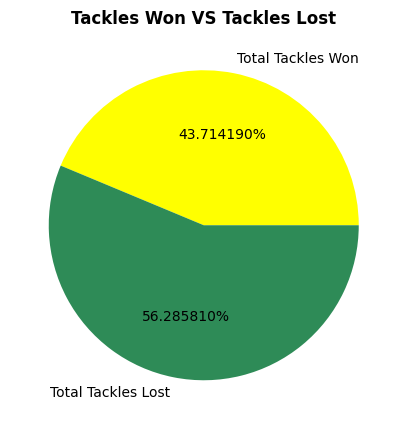

In [53]:
plt.figure(figsize=(5,6))
data=[total_tack_won,total_tack_lost]
labels=["Total Tackles Won","Total Tackles Lost"]
plt.pie(data,labels=labels,colors=["yellow","seagreen"], autopct='%0f%%')
plt.title("Tackles Won VS Tackles Lost", fontsize=12, fontweight='bold')
plt.show()

In [6]:
ucl_disp.head()

,serial,player_name,club,position,fouls_committed,fouls_suffered,yellow,red,minutes_played,match_played
0,1,João Palhinha,Sporting CP,Midfielder,23,17,2,0,534,6
1,2,Capoue,Villarreal,Midfielder,19,17,3,1,1046,12
2,2,Rodri,Man. City,Midfielder,19,4,2,0,842,10
3,2,Seiwald,Salzburg,Midfielder,19,3,2,0,649,8
4,5,Balanta,Club Brugge,Midfielder,18,3,4,0,407,5


In [10]:
total_reds=ucl_disp['red'].sum()

In [11]:
total_yellow=ucl_disp['yellow'].sum()

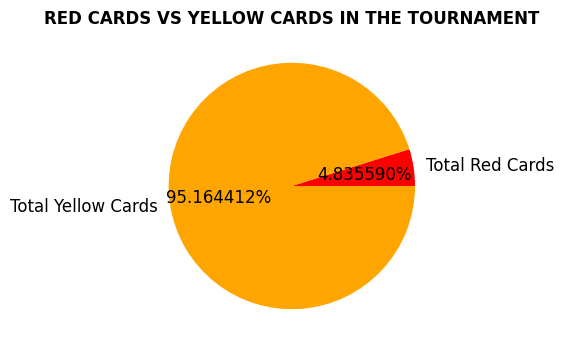

In [27]:
plt.figure(figsize=(5,4))
data=[total_reds,total_yellow]
labels=("Total Red Cards","Total Yellow Cards")
plt.title("RED CARDS VS YELLOW CARDS IN THE TOURNAMENT", fontweight='bold')
plt.pie(data,labels=labels,colors=['red','orange'],autopct="%0f%%",textprops={'fontsize': 12})
plt.show()

In [32]:
#top 10 players with most yellow cards
ucl_disp.nlargest(n=10,columns='yellow')

,serial,player_name,club,position,fouls_committed,fouls_suffered,yellow,red,minutes_played,match_played
4,5,Balanta,Club Brugge,Midfielder,18,3,4,0,407,5
6,6,Éder Militão,Real Madrid,Defender,17,16,4,0,1076,12
10,6,Álvarez,Ajax,Midfielder,17,6,4,0,558,7
53,40,Guilavogui,Wolfsburg,Midfielder,11,2,4,1,429,5
181,146,Ikoné,LOSC,Midfielder,6,2,4,0,297,5
182,146,Adams,Leipzig,Midfielder,6,2,4,0,292,5
1,2,Capoue,Villarreal,Midfielder,19,17,3,1,1046,12
5,6,Casemiro,Real Madrid,Midfielder,17,18,3,0,914,11
16,16,Capaldo,Salzburg,Midfielder,15,8,3,0,281,7
18,16,Carvajal,Real Madrid,Defender,15,6,3,0,959,11


In [33]:
#top 10 players with most yellow cards
ucl_disp.nlargest(n=10,columns='red')

,serial,player_name,club,position,fouls_committed,fouls_suffered,yellow,red,minutes_played,match_played
139,107,Felipe,Atlético,Defender,7,2,3,2,472,7
1,2,Capoue,Villarreal,Midfielder,19,17,3,1,1046,12
53,40,Guilavogui,Wolfsburg,Midfielder,11,2,4,1,429,5
66,55,Jordán,Sevilla,Midfielder,10,4,2,1,327,6
81,71,Kessié,Milan,Midfielder,9,6,2,1,321,5
84,71,Coquelin,Villarreal,Midfielder,9,4,2,1,463,8
133,107,Souza,Besiktas,Midfielder,7,3,3,1,442,5
141,107,Chistiakov,Zenit,Defender,7,1,2,1,444,5
142,107,Wendell,Porto,Defender,7,1,1,1,131,4
169,146,Griezmann,Atlético,Forward,6,4,0,1,518,9


In [41]:
#creating a new column to see the average time players play in a match
ucl_disp["avg_time"]=ucl_disp["minutes_played"]/ucl_disp["match_played"]
ucl_disp.sample(5)

,serial,player_name,club,position,fouls_committed,fouls_suffered,yellow,red,minutes_played,match_played,avg_time
420,417,Alex Telles,Man. United,Defender,2,6,2,0,293,4,73.250000
248,201,Sowah,Club Brugge,Forward,5,2,0,0,298,5,59.600000
48,40,Laimer,Leipzig,Midfielder,11,5,0,0,405,6,67.500000
493,491,Birmancevic,Malmö,Midfielder,1,10,0,0,356,6,59.333333
435,417,Tymchyk,Dynamo Kyiv,Defender,2,3,1,0,160,4,40.000000


In [57]:
ucl_disp.sort_values(by=["match_played","avg_time"],ascending=[False,False]).head(10)

,serial,player_name,club,position,fouls_committed,fouls_suffered,yellow,red,minutes_played,match_played,avg_time
25,26,Vinícius Júnior,Real Madrid,Forward,13,24,1,0,1199,13,92.230769
334,326,Modric,Real Madrid,Midfielder,3,8,1,0,1077,13,82.846154
266,263,Salah,Liverpool,Forward,4,12,0,0,1008,13,77.538462
13,12,Luis Díaz,Porto,Forward,16,10,1,0,908,13,69.846154
20,20,Fabinho,Liverpool,Midfielder,14,11,1,0,849,13,65.307692
11,12,Mané,Liverpool,Midfielder,16,19,2,0,822,13,63.230769
427,417,Benzema,Real Madrid,Forward,2,4,1,0,1106,12,92.166667
382,326,Pau Torres,Villarreal,Defender,3,2,1,0,1080,12,90.000000
6,6,Éder Militão,Real Madrid,Defender,17,16,4,0,1076,12,89.666667
264,263,Parejo,Villarreal,Midfielder,4,17,2,0,1055,12,87.916667


In [58]:
ucl_disp.sort_values(by=["avg_time","match_played"],ascending=[False,False]).head(10)

,serial,player_name,club,position,fouls_committed,fouls_suffered,yellow,red,minutes_played,match_played,avg_time
49,40,João Cancelo,Man. City,Defender,11,4,3,0,840,9,93.333333
50,40,Rüdiger,Chelsea,Defender,11,3,2,0,840,9,93.333333
25,26,Vinícius Júnior,Real Madrid,Forward,13,24,1,0,1199,13,92.230769
427,417,Benzema,Real Madrid,Forward,2,4,1,0,1106,12,92.166667
382,326,Pau Torres,Villarreal,Defender,3,2,1,0,1080,12,90.000000
231,201,Vertonghen,Benfica,Defender,5,4,0,0,900,10,90.000000
7,6,Otamendi,Benfica,Defender,17,11,2,0,810,9,90.000000
65,55,Weigl,Benfica,Midfielder,10,5,2,0,810,9,90.000000
301,263,Van Dijk,Liverpool,Defender,4,2,1,0,810,9,90.000000
24,20,Kristensen,Salzburg,Defender,14,4,1,0,720,8,90.000000


In [70]:
ucl_fouls_club=ucl_disp.nlargest(n=10,columns='fouls_committed')
print(ucl_fouls_club)

   serial    player_name         club    position  fouls_committed  \
0       1  João Palhinha  Sporting CP  Midfielder               23   
1       2         Capoue   Villarreal  Midfielder               19   
2       2          Rodri    Man. City  Midfielder               19   
3       2        Seiwald     Salzburg  Midfielder               19   
4       5        Balanta  Club Brugge  Midfielder               18   
5       6       Casemiro  Real Madrid  Midfielder               17   
6       6   Éder Militão  Real Madrid    Defender               17   
7       6       Otamendi      Benfica    Defender               17   
8       6    Gravenberch         Ajax  Midfielder               17   
9       6         Haller         Ajax     Forward               17   

   fouls_suffered  yellow  red  minutes_played  match_played   avg_time  
0              17       2    0             534             6  89.000000  
1              17       3    1            1046            12  87.166667  
2      

C:\Users\User\AppData\Local\Temp\ipykernel_10556\2854644926.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ucl_fouls_club.groupby('club').sum()['fouls_committed'].index, y=ucl_fouls_club.groupby('club').sum()['fouls_committed'].values,


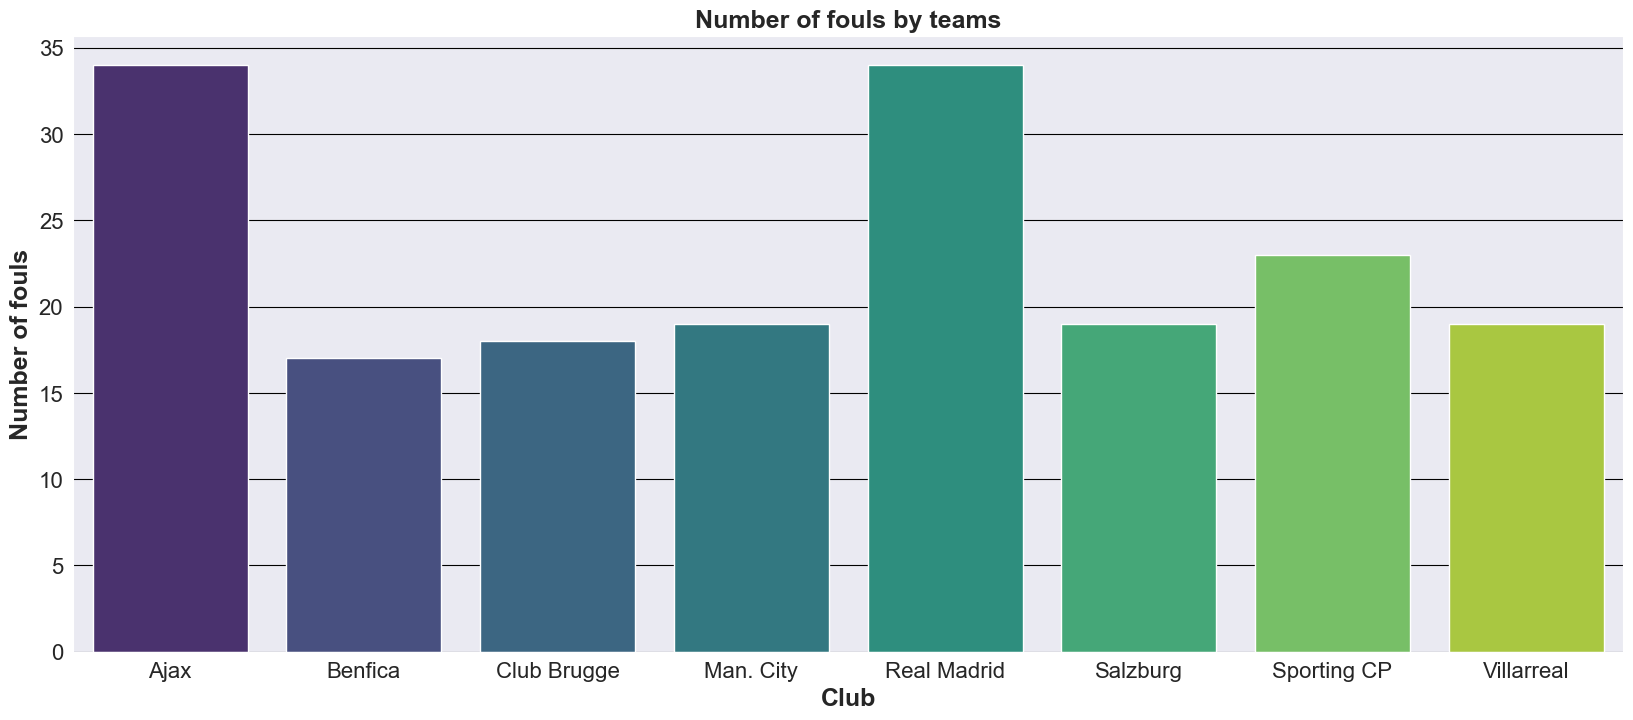

In [84]:
plt.figure(figsize=(20, 8))
plt.title('Number of fouls by teams', fontsize=18, fontweight='bold')
sns.barplot(x=ucl_fouls_club.groupby('club').sum()['fouls_committed'].index, y=ucl_fouls_club.groupby('club').sum()['fouls_committed'].values, 
            palette='viridis')
sns.set_style({'grid.color': 'black'})
plt.xlabel('Club', fontsize=18, fontweight='bold')
plt.ylabel('Number of fouls', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()